# Tennis Ace Challenge 
##  A Multiple Linear Regression Problem
### by Eleazar I. Madariaga González

I will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling The Association of Tennis Professionals (ATP) data, I will determine what it takes to be one of the best tennis players in the world.

### First thing first

##### Necessary imports

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### “Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world.  
Today I will put my linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.
Provided in __tennis_stats.csv__ is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals).  
Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. 
  
Information about each column of the set:

The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:
  
  __Identifying Data__

* __Player:__ name of the tennis player
* __Year:__ year data was recorded

__Service Game Columns (Offensive)__

* __Aces:__ number of serves by the player where the receiver does not touch the ball  
* __DoubleFaults:__ number of times player missed both first and second serve attempts
* __FirstServe:__ % of first-serve attempts made
* __FirstServePointsWon:__ % of first-serve attempt points won by the player
* __SecondServePointsWon:__ % of second-serve attempt points won by the player
* __BreakPointsFaced:__ number of times where the receiver could have won service game of the player
* __BreakPointsSaved:__ % of the time the player was able to stop the receiver from winning service game when they had the chance
* __ServiceGamesPlayed:__ total number of games where the player served
* __ServiceGamesWon:__ total number of games where the player served and won
* __TotalServicePointsWon:__ % of points in games where the player served that they won

__Return Game Columns (Defensive)__

* __FirstServeReturnPointsWon:__ % of opponents first-serve points the player was able to win
* __SecondServeReturnPointsWon:__ % of opponents second-serve points the player was able to win
* __BreakPointsOpportunities:__ number of times where the player could have won the service game of the opponent
* __BreakPointsConverted:__ % of the time the player was able to win their opponent’s service game when they had the chance
* __ReturnGamesPlayed:__ total number of games where the player’s opponent served
* __ReturnGamesWon:__ total number of games where the player’s opponent served and the player won
* __ReturnPointsWon:__ total number of points where the player’s opponent served and the player won
* __TotalPointsWon:__ % of points won by the player

__Outcomes__

* __Wins:__ number of matches won in a year
* __Losses:__ number of matches lost in a year
* __Winnings:__ total winnings in USD($) in a year
* __Ranking:__ ranking at the end of year


##### Load the csv into a DataFrame and investigate it to gain familiarity with the data.
###### EDA: Exploratory Data analysis

In [4]:
df = pd.read_csv('tennis_stats.csv')

In [5]:
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [6]:
print(df.columns)

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')


In [7]:
print(df.describe())

              Year   FirstServe  FirstServePointsWon  \
count  1721.000000  1721.000000          1721.000000   
mean   2013.646717     0.598053             0.680738   
std       2.488018     0.054533             0.070422   
min    2009.000000     0.360000             0.270000   
25%    2012.000000     0.570000             0.650000   
50%    2014.000000     0.600000             0.690000   
75%    2016.000000     0.630000             0.720000   
max    2017.000000     0.880000             0.890000   

       FirstServeReturnPointsWon  SecondServePointsWon  \
count                1721.000000           1721.000000   
mean                    0.261673              0.479733   
std                     0.056639              0.066902   
min                     0.000000              0.060000   
25%                     0.240000              0.460000   
50%                     0.270000              0.490000   
75%                     0.290000              0.520000   
max                     0.48000

##### Exploratory Analysis

Exploratory perform analysis on the data by plotting different features against the different outcomes.  
What relationships do you find between the features and outcomes?  
Do any of the features seem to predict the outcomes?  
I utilized matplotlib’s __.scatter()__ method to plot different features against different outcomes.

In [8]:
print(df.corr())

                                Year  FirstServe  FirstServePointsWon  \
Year                        1.000000    0.051406            -0.016728   
FirstServe                  0.051406    1.000000            -0.070659   
FirstServePointsWon        -0.016728   -0.070659             1.000000   
FirstServeReturnPointsWon  -0.106784    0.025488             0.021729   
SecondServePointsWon        0.005300    0.101417             0.320765   
SecondServeReturnPointsWon -0.039087   -0.001924            -0.004724   
Aces                       -0.108367    0.048149             0.460323   
BreakPointsConverted       -0.072404   -0.018877            -0.041538   
BreakPointsFaced           -0.101735    0.057709             0.301925   
BreakPointsOpportunities   -0.114806    0.062345             0.324853   
BreakPointsSaved           -0.006154    0.087945             0.405751   
DoubleFaults               -0.071885   -0.005477             0.373321   
ReturnGamesPlayed          -0.108405    0.071776   

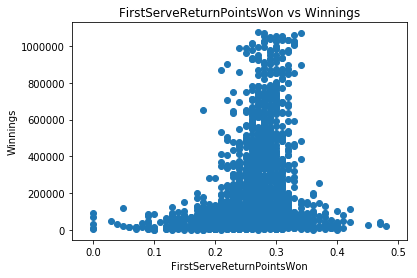

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(df['FirstServeReturnPointsWon'],df['Winnings'])
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()
plt.clf()

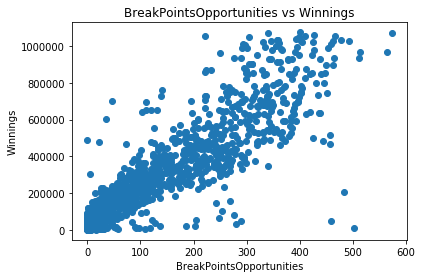

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(df['BreakPointsOpportunities'],df['Winnings'])
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()
plt.clf()

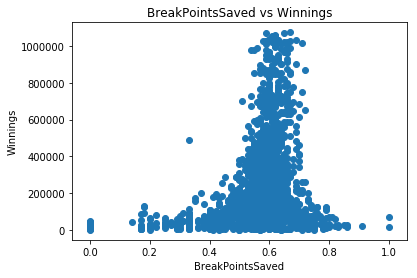

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(df['BreakPointsSaved'],df['Winnings'])
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings')
plt.show()
plt.clf()

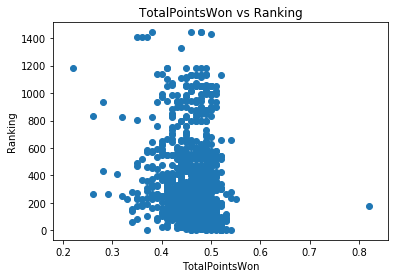

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(df['TotalPointsWon'],df['Ranking'])
plt.title('TotalPointsWon vs Ranking')
plt.xlabel('TotalPointsWon')
plt.ylabel('Ranking')
plt.show()
plt.clf()

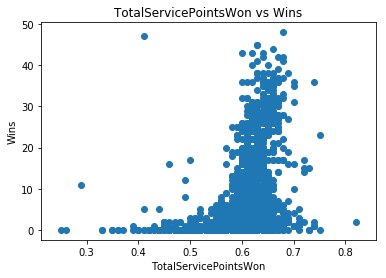

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(df['TotalServicePointsWon'],df['Wins'])
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()

I found a strong relationship between the __BreakPointsOpportunities__ feature and the __Winnings__
outcome.

### Building the model

I use one feature from the dataset to build a single feature linear regression model on the data. The model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, I split the data into training and test datasets so that I can evaluate the model on the test set.  
How does your model perform?  
I Plot model’s predictions on the test set against the actual outcome variable to visualize the performance.  
Our first single feature linear regression model used __'FirstServeReturnPointsWon'__ as our feature and __Winnings__ as our outcome.

Predicting Winnings with FirstServeReturnPointsWon Test Score: 0.02644676103413457


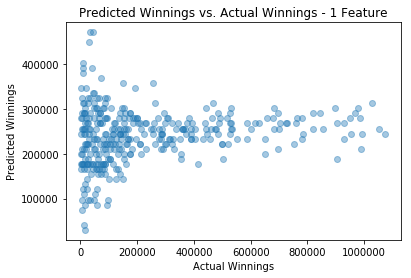

Predicting Winnings with 2 Features Test Score: 0.7841085147001216


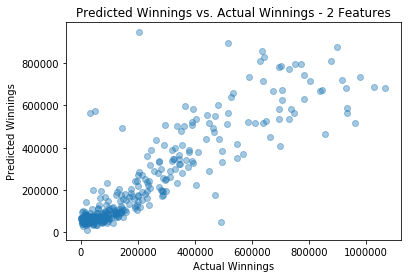

Predicting Winnings with Multiple Features Test Score: 0.8609817982744983


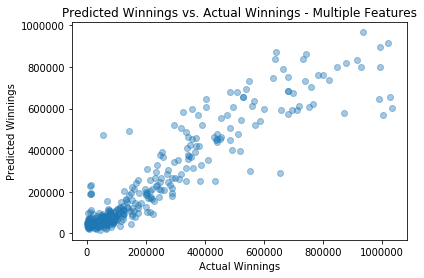

<Figure size 432x288 with 0 Axes>

In [27]:
# single feature linear regression (FirstServeReturnPointsWon)
# select features and value to predict
features = df[['FirstServeReturnPointsWon']]
winnings = df[['Winnings']]

# We utilized scikit-learn’s train_test_split function to split our data into training and test sets:
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8, 
                                                                                test_size = 0.2)

# Then I created a linear regression model and trained it on the training data:
model = LinearRegression()
model.fit(features_train,winnings_train)

# To score the model on the test data, we used our LinearRegression object’s .score() method.
print('Predicting Winnings with FirstServeReturnPointsWon Test Score:', model.score(features_test,winnings_test))

# Then I found the predicted outcome based on our model and plotted it against the actual outcome.
# Make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## two feature linear regression

# select features and value to predict
features = df[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8, 
                                                                               test_size = 0.2)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with 2 Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## multiple features linear regression

# select features and value to predict
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon',
               'SecondServeReturnPointsWon','Aces','BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
               'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon',
               'ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8, 
                                                                                test_size = 0.2)
                                                                            

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

                                                                                                                       By  
                                                                                            Eleazar I. Madariaga González
                                                                                      As part of my Data Analyst training
                                                                         Thanks to Codecademy for preparing  the data set